# PHYS 411 - Homework 3
Due Tuesday September 20, 2022 at 9:30

You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%203.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%203.ipynb)

When you are finished with your work, please print to a PDF file and submit via canvas.

**Remember: this class is about atomic physics, not about Python, so if the Python code is standing in your way, you are free to solve the problems another way (e.g., using Matlab or Mathematica, or by hand), or you can ask me for the code that you need.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Problem 1 - Parity of Spherical Harmonics
1. Show that the spherical harmonics $Y_{lm}(\theta, \phi)$ are even or odd under parity. You can do this a few different ways:
    - Make an argument for the following relation: $Y_{lm}(\pi-\theta, \phi+\pi) = (-1)^l Y_{lm}(\theta, \phi)$. For this you should use the definition of $Y_{ll} \propto \sin^l(\theta) e^{i l \phi}$ as well as the lowering operator,
    $$ \hat{l}_- = e^{-i \phi} \left( - \frac{\partial}{\partial \theta} + i \cot(\theta) \frac{\partial}{\partial \phi}\right)$$
    I recommend  Showing this by verifying the relationship for $Y_{ll}$, applying the lowering operator once and verifying the relationship for $Y_{l,l-1}$, and then making an argument for why successive applications of the lowering operator will not change the parity.
    - You can also verify this relationship numerically. Choose a good sample of different spherical harmonic functions (say, 6 different ones), and plot both $Y_{lm}(\theta, \phi)$ and $\hat{P} Y_{lm}(\theta, \phi) = Y_{lm}(\pi-\theta, \phi+\pi)$ Show that those with odd $l$ are odd, and those with even $l$ are even. You can use the functions from last week's homework

In [2]:
import scipy.special
def Y_lm(l, m, theta, phi):
    return scipy.special.sph_harm(m, l, phi, theta)

# Problem 2 - Dipole matrix elements
The rate of the transition from some state $\left|2\right>$ to state $\left|1\right>$ is proportional to the *electric dipole matrix element*
$$ \left<2\right| \vec{r} \cdot \hat{e}_\text{rad} \left|1\right>$$

1. Calculate the dipole matrix element between the $\psi_{211}$ state of hydrogen and the ground state ($\psi_{100}$) for $\sigma$ polarized radiation. You can use $\psi_{nlm}(r,\theta,\phi)=R_{nl}(r) Y_{lm}(\theta,\phi)$ and the definitions of $R_{nl}(r)$ and $Y_{lm}(\theta,\phi)$ from last week and perform the integration numerically.
2. Calculate the dipole matrix elements between $\psi_{200}$ and the ground state for $\pi$ polarized and $\sigma$ polarized light.
3. Calculate the dipole matrix element between $\psi_{322}$ and $\psi_{211}$ for $\pi$ polarized and $\sigma$ polarized light.

**Note: you can calculate the radial and angular part of the integrals separately, and multiply their result together.**

In [3]:
from scipy.integrate import trapezoid
from math import factorial

def R(n, l, r):
    rho = 2*r/n
    A = np.sqrt((2/n)**3*factorial(n-l-1)/(2*n*factorial(n+l)))
    L = scipy.special.genlaguerre(n-l-1, 2*l+1)
    return A * rho**l * np.exp(-rho/2) * L(rho)



# you can integrate the radial wavefunction numerically using `trapezoid`
r = np.linspace(0, 100, 5000) # we want to integrate from r=0 a0 to r=100 a0 in 5000 steps,
trapezoid(r**2 * R(n=2,l=1,r=r)**2, r) 
# integrate r^2 |R_21|^2 from 0 a0 to 100 a0 numerically. This ought to be 1.

# you can calculate a matrix element by integrating `r**2 R(n1,l1,r) * r * R(n2,l2,r)`

1.0000000000000104

In [4]:
# you can integrate the angular wavefunction numerically using `trapezoid` twice
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 150)
theta2, phi2 = np.meshgrid(theta, phi)
trapezoid(
    trapezoid(
        np.sin(theta2)*Y_lm(1,1,theta2,phi2).conj()*Y_lm(1,1,theta2,phi2),
        theta),
    phi
)

# you can calculate a matrix element by integrating, e.g.,
# `np.sin(theta2)*Y_lm(l1,m1,theta2,phi2).conj()*cos(theta2)*Y_lm(l2,m2,theta2,phi2)`
# you consider a matrix element oriented along the z-direction

(1.0000000126786457-1.2167547344570584e-20j)

# Problem 3 - Spin-Orbit split Balmer series
Consider the following calculated spectrum for the Balmer series of hydrogen (lower state $n'=2$). Currently this is done using the function `Balmer(n)` which only takes into account the gross structure of hydrogen. Modify this function to calculate the transition wavelengths between upper states $(n,l,j)$ and lower states $(n',l',j')$, now taking into account the spin-orbit energy correction:
$$ \Delta E = \frac{\alpha^2}{n l(l+1/2)(l+1)} E(n) \left< \vec{S}\cdot\vec{L}\right>$$
**Note: you need to calculate the correction to *both* the upper and lower states, and then find the shift in the transition wavelength**
Make a new figure for the Balmer series, incorportating spin-orbit, for transitions with upper state principal quantum numbers $n'$ 3 through 13, and for lower states with principal quantum number $n=2$. Consider all possible upper and lower state angular momentum. To get started, consider the following:
1. What possible values are there for $S$, $L$ and $J$ for the lower state $n=2$?
2. What possible transitions are allowed from these states to upper states, taking into account the selection rules $\Delta l = \pm1$ and $\Delta j = 0$ or $\pm 1$. 
3. How many different transitions does the $n=2$ to $n'=3$ transition split into?
4. Calculate the wavelength of all allowed transitions between $n=2$ and $n'=3$ through $13$. Color the transitions with upper state $l'=0$, $l'=1$, and $l'=2$ lines differently, and label them with their appropriate spectroscopic series.

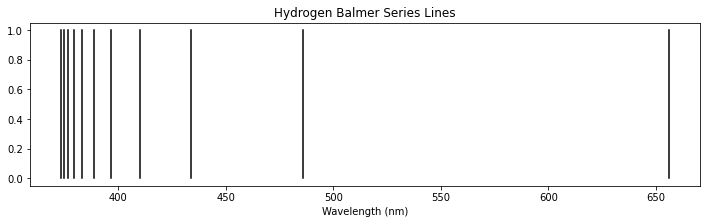

In [5]:
def Balmer(n):
    return 1e9/(10973731 * (1/2**2 - 1/n**2))
    
n = np.arange(3,14)
Balmer(n)

plt.figure(figsize=(12,3))
for line in Balmer(n):
    plt.plot([line, line], [0, 1], 'k')
plt.xlabel('Wavelength (nm)');
plt.title('Hydrogen Balmer Series Lines');

# Problem 4 - Spin-Orbit splitting
Consider an atomic state with spectroscopic notation $^5\text{D}$.
1. What are the quantum numbers $S$ and $L$?
2. What possibly values can $J$ take?
3. Assume the Spin-Orbit interaction can be described by the effective Hamiltonian $H_{SO} = -A \vec{S} \cdot \vec{L}$. Draw a diagram of the different energy levels that $^5\text{D}$ can split into, and their energies. Label each state with its spectroscopic notation, including $J$. For numerical simplicity, you can assume that $A = h \times \text{1 THz}$.

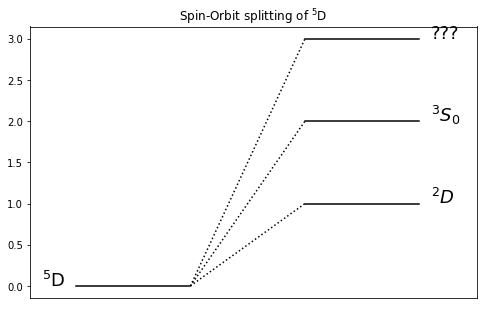

In [6]:
# Here is some example code you can use to make an attractive figure
# edit `energies` and `labels` at will
energies = [1, 2, 3] # as an example
labels = ['$^{2}D$', '$^{3}S_0$', '???']

plt.figure(figsize=(8,5))
plt.plot([-2, -1], [0, 0], 'k-')
plt.text(-2.3, 0, '$^{5}$D', fontsize=18)
for energy, label in zip(energies, labels):
    plt.plot([0, 1], [energy, energy], 'k-')
    plt.plot([-1, 0], [0, energy], 'k:')
    plt.text(1.1, energy, label, fontsize=18)
plt.xticks([])
plt.xlim(-2.4,1.5)
plt.title('Spin-Orbit splitting of $^{5}$D');